In [246]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Import and preprocess data from csv

In [247]:
raw_df = pd.read_csv("metadata.csv")
raw_df.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


In [248]:
COI = ["diagnostic", "age", "itch", "grew", "hurt", "changed", "bleed", "elevation", "biopsed"]
COI2 = ["diagnostic", "age", "itch", "grew", "hurt", "changed", "bleed", "elevation", "biopsed", "fitspatrick"]
df = raw_df.loc[:,COI]
df2 = raw_df.loc[:,COI2]
df = df.dropna()
df2 = df2.dropna()



In [249]:
COIbool = ["itch", "grew", "hurt", "changed", "bleed", "elevation", "biopsed"]
d = {"False": 0, "True": 1, False: 0, True:1, "UNK": 0.5}
for col in COIbool:
    df2[col] = df2[col].replace(d)
    df[col] = df[col].replace(d)
df = df.dropna()
df2 = df2.dropna()
df2

,diagnostic,age,itch,grew,hurt,changed,bleed,elevation,biopsed,fitspatrick
1,BCC,55,1.0,1.0,0.0,1.0,1.0,1.0,1,3.0
4,BCC,79,1.0,1.0,0.0,0.0,1.0,1.0,1,1.0
6,BCC,52,0.0,1.0,0.0,1.0,1.0,1.0,1,3.0
7,BCC,74,1.0,1.0,1.0,0.0,1.0,1.0,1,1.0
9,ACK,58,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
2289,ACK,66,1.0,0.0,1.0,0.0,1.0,1.0,1,2.0
2291,BCC,41,1.0,0.5,1.0,0.5,1.0,1.0,1,2.0
2292,SCC,43,1.0,0.5,0.0,0.5,1.0,1.0,1,2.0
2294,BCC,55,1.0,1.0,0.0,1.0,0.0,0.0,1,3.0


In [250]:
y = df["diagnostic"]
X = df.drop("diagnostic",axis=1)

In [251]:
cancers = {"BCC":1, "MEL":1, "SCC": 1, "ACK": 0, "NEV":0, "SEK":0}
y = y.replace(cancers)

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, train_size=0.75)

In [265]:
X_train

,age,itch,grew,hurt,changed,bleed,elevation,biopsed
184,55,1.0,1.0,0.0,0.0,1.0,1.0,1
707,73,1.0,1.0,0.0,0.0,1.0,1.0,1
1915,65,1.0,0.0,0.0,0.0,1.0,0.0,0
302,67,1.0,1.0,1.0,0.0,1.0,1.0,1
1943,9,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
1169,66,1.0,1.0,0.0,0.0,0.0,0.0,0
2198,57,1.0,1.0,0.0,0.0,1.0,0.0,1
490,57,0.0,1.0,0.0,0.0,0.0,1.0,0
520,55,0.0,0.5,0.0,0.5,0.0,1.0,1


In [253]:
X_test


,age,itch,grew,hurt,changed,bleed,elevation,biopsed
607,54,1.0,0.0,0.0,0.0,0.0,0.0,0
2276,84,1.0,0.5,0.0,0.5,0.0,1.0,1
1030,42,1.0,0.0,0.0,0.0,0.0,0.0,0
1463,44,1.0,0.5,1.0,0.5,1.0,1.0,1
374,80,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
547,60,1.0,0.5,1.0,0.0,0.0,1.0,1
1720,27,0.0,0.0,0.0,0.0,0.0,0.0,1
993,65,1.0,0.5,1.0,0.5,1.0,1.0,1
1488,62,1.0,1.0,1.0,0.0,1.0,1.0,1


In [267]:
from sklearn.metrics import accuracy_score, roc_auc_score

n_vals = [i for i in range(1,164)]
knn_classifiers = []

for i in n_vals:
    knnc = KNeighborsClassifier(n_neighbors=i)
    knnc.fit(X_train, y_train)
    knn_classifiers.append(knnc)

predicted_ys = [model.predict(X_test) for model in knn_classifiers]
accuracy_scores = [accuracy_score(y_test, y_pred) for y_pred in predicted_ys]
roc_auc_scores = [roc_auc_score(y_test,y_pred) for y_pred in predicted_ys]

for i, val in enumerate(n_vals):
    print(f"N = {val} \t Accuracy scores = {round(accuracy_scores[i], 4)} \t ROC AUC Scores = {round(roc_auc_scores[i],4)}")


N = 1 	 Accuracy scores = 0.8974 	 ROC AUC Scores = 0.8975
N = 2 	 Accuracy scores = 0.8661 	 ROC AUC Scores = 0.8656
N = 3 	 Accuracy scores = 0.8904 	 ROC AUC Scores = 0.8906
N = 4 	 Accuracy scores = 0.8713 	 ROC AUC Scores = 0.8711
N = 5 	 Accuracy scores = 0.8817 	 ROC AUC Scores = 0.882
N = 6 	 Accuracy scores = 0.8626 	 ROC AUC Scores = 0.8626
N = 7 	 Accuracy scores = 0.8661 	 ROC AUC Scores = 0.8664
N = 8 	 Accuracy scores = 0.8661 	 ROC AUC Scores = 0.8662
N = 9 	 Accuracy scores = 0.8609 	 ROC AUC Scores = 0.8612
N = 10 	 Accuracy scores = 0.8678 	 ROC AUC Scores = 0.868
N = 11 	 Accuracy scores = 0.8626 	 ROC AUC Scores = 0.8629
N = 12 	 Accuracy scores = 0.8591 	 ROC AUC Scores = 0.8592
N = 13 	 Accuracy scores = 0.8609 	 ROC AUC Scores = 0.8611
N = 14 	 Accuracy scores = 0.8591 	 ROC AUC Scores = 0.8593
N = 15 	 Accuracy scores = 0.8643 	 ROC AUC Scores = 0.8646
N = 16 	 Accuracy scores = 0.8643 	 ROC AUC Scores = 0.8646
N = 17 	 Accuracy scores = 0.8643 	 ROC AUC Scores 

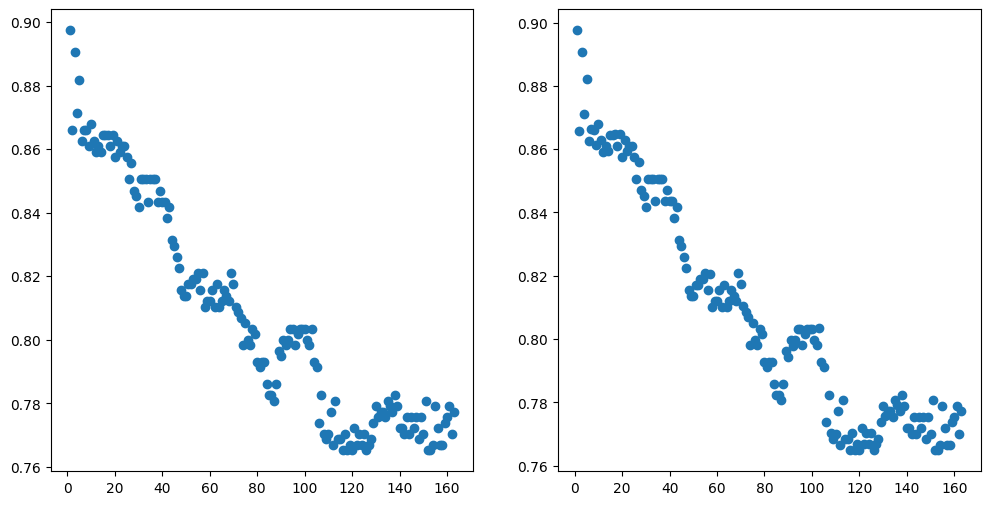

In [268]:
fig, ax = plt.subplots(ncols = 2, figsize=(12,6))
ax[0].scatter(n_vals,accuracy_scores)

ax[1].scatter(n_vals, roc_auc_scores)


In [266]:
import math

4*math.sqrt(1700)

164.92422502470643

In [256]:
y_pred2 = knn_classifiers[2].predict(X_test)





In [257]:
X_test

,age,itch,grew,hurt,changed,bleed,elevation,biopsed
607,54,1.0,0.0,0.0,0.0,0.0,0.0,0
2276,84,1.0,0.5,0.0,0.5,0.0,1.0,1
1030,42,1.0,0.0,0.0,0.0,0.0,0.0,0
1463,44,1.0,0.5,1.0,0.5,1.0,1.0,1
374,80,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
547,60,1.0,0.5,1.0,0.0,0.0,1.0,1
1720,27,0.0,0.0,0.0,0.0,0.0,0.0,1
993,65,1.0,0.5,1.0,0.5,1.0,1.0,1
1488,62,1.0,1.0,1.0,0.0,1.0,1.0,1


In [258]:
X_test_fits = pd.concat([df2["fitspatrick"], X_test], axis = 1).dropna()

In [260]:
accu = []

for i in range(4):
    x2 = X_test_fits.loc[X_test_fits["fitspatrick"] == i+1]
    y_pred2 = knn_classifiers[2].predict(x2.drop("fitspatrick", axis = 1))
    
    idx = x2.index
    print(len(idx))
    l = [y_test.loc[id] for id in idx]
    accu.append(accuracy_score(l, y_pred2))


40
221
109
22


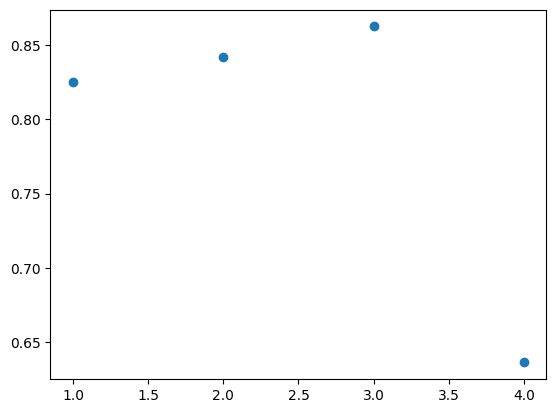

In [262]:
plt.scatter([1,2,3,4], accu)